# K-Means

## import dataset

In [1]:
import pandas as pd
cust_df = pd.read_csv("data.csv")
cust_df.head(3)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9


## cleaning

In [2]:
df = cust_df.drop(['Address', 'Customer Id'], axis=1) 
df.head(3)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        700 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 53.3 KB


In [4]:
# df[df['Defaulted'].isna()]

## define X

In [5]:
import numpy as np
X = df.values
X = np.nan_to_num(X)

In [6]:
pd.DataFrame(X).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       850 non-null    float64
 1   1       850 non-null    float64
 2   2       850 non-null    float64
 3   3       850 non-null    float64
 4   4       850 non-null    float64
 5   5       850 non-null    float64
 6   6       850 non-null    float64
 7   7       850 non-null    float64
dtypes: float64(8)
memory usage: 53.3 KB


## scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X)
X = sc.transform(X)
X[:5]

array([[ 0.74291541,  0.31212243, -0.37878978, -0.71845859, -0.68381116,
        -0.59048916, -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 ,  1.38432469,  1.41447366,
         1.51296181, -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 ,  0.26803233,  2.13414111,
         0.80170393,  1.90913822,  1.59755385],
       [-0.75023477,  0.31212243, -0.67404087, -0.71845859, -0.42164323,
        -0.75446707, -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  3.31184882,  5.35624866,  3.63890032,
         1.71609424, -0.52379654, -0.44250653]])

## fit the data

In [8]:
from sklearn.cluster import KMeans
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means.fit(X)

KMeans(n_clusters=3, n_init=12)

In [9]:
labels = k_means.labels_
labels[:10]

array([1, 2, 0, 1, 2, 2, 1, 1, 1, 2])

In [10]:
centers = k_means.cluster_centers_
centers

array([[-3.90439547e-01,  1.62695612e-01, -6.79376729e-01,
        -3.86448408e-01, -6.83901553e-05, -6.93056978e-02,
         1.87982575e+00,  5.69270845e-01],
       [-1.50796609e-01, -1.15651304e-01, -1.38795179e-01,
        -2.73411279e-01, -3.40626044e-01, -3.71502176e-01,
        -5.23796543e-01, -3.28592133e-01],
       [ 9.91773769e-01,  2.38756999e-01,  1.27421461e+00,
         1.43518566e+00,  1.24440502e+00,  1.43538377e+00,
        -2.09335587e-01,  5.57517111e-01]])

## concatenating

In [11]:
df["label"] = labels
df.head(3)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,label
0,41,2,6,19,0.124,1.073,0.0,6.3,1
1,47,1,26,100,4.582,8.218,0.0,12.8,2
2,33,2,10,57,6.111,5.802,1.0,20.9,0


In [12]:
df['label'].unique()

array([1, 2, 0])

In [13]:
df.groupby('label').mean()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
label,,,,,,,,
0,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578
1,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991
2,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646


## elbow method for optimum k

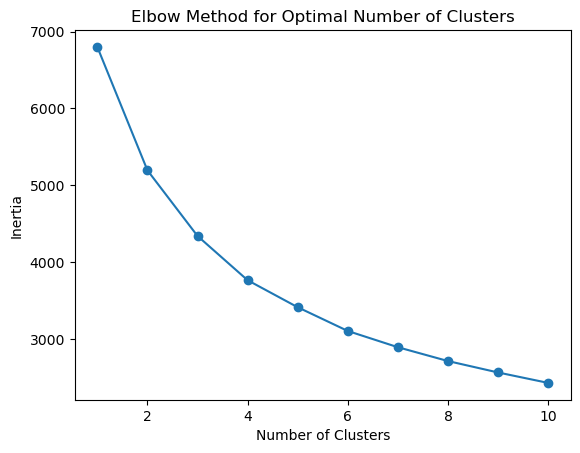

In [14]:
import matplotlib.pyplot as plt

# Calculate the inertia for different numbers of clusters
inertia_values = []

for k in range(1, 11):
    k_means = KMeans(init="k-means++", n_clusters=k, n_init=12, random_state=0)
    k_means.fit(X)
    inertia_values.append(k_means.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.show()